In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

# Loading data

In [3]:
X = pickle.load(open("Data\X.pickle", "rb"))
y = pickle.load(open("Data\y.pickle", "rb"))

# Scaling pixels

In [4]:
import matplotlib.pyplot as plt
import random

Before scaling:


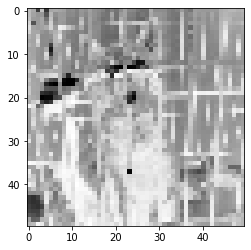

In [5]:
random_num = random.randint(0, len(X))
print("Before scaling:")
plt.imshow(X[random_num][:, :, 0], cmap=plt.cm.binary)

After scaling:


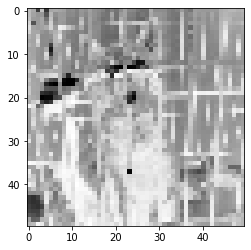

In [6]:
X = X/255
print("After scaling:")
plt.imshow(X[random_num][:, :, 0], cmap=plt.cm.binary)

# Building model

In [7]:
model = Sequential()

# Input layer
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden layer 1
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden layer 2
model.add(Flatten())
model.add(Dense(64))

# Output layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training

In [8]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 204s 9ms/step - loss: 0.6186 - acc: 0.6562 - val_loss: 0.5586 - val_acc: 0.7114
Epoch 2/10
22451/22451 [==============================] - 223s 10ms/step - loss: 0.5244 - acc: 0.7401 - val_loss: 0.5199 - val_acc: 0.7547
Epoch 3/10
22451/22451 [==============================] - 226s 10ms/step - loss: 0.4837 - acc: 0.7670 - val_loss: 0.4743 - val_acc: 0.7695
Epoch 4/10
22451/22451 [==============================] - 238s 11ms/step - loss: 0.4490 - acc: 0.7916 - val_loss: 0.4548 - val_acc: 0.7876
Epoch 5/10
22451/22451 [==============================] - 255s 11ms/step - loss: 0.4242 - acc: 0.8056 - val_loss: 0.4887 - val_acc: 0.7683
Epoch 6/10
22451/22451 [==============================] - 269s 12ms/step - loss: 0.4062 - acc: 0.8132 - val_loss: 0.4765 - val_acc: 0.7832
Epoch 7/10
22451/22451 [==============================] - 252s 11ms/step - loss: 0.3835 - acc: 0.8268 - val_loss: 0.49